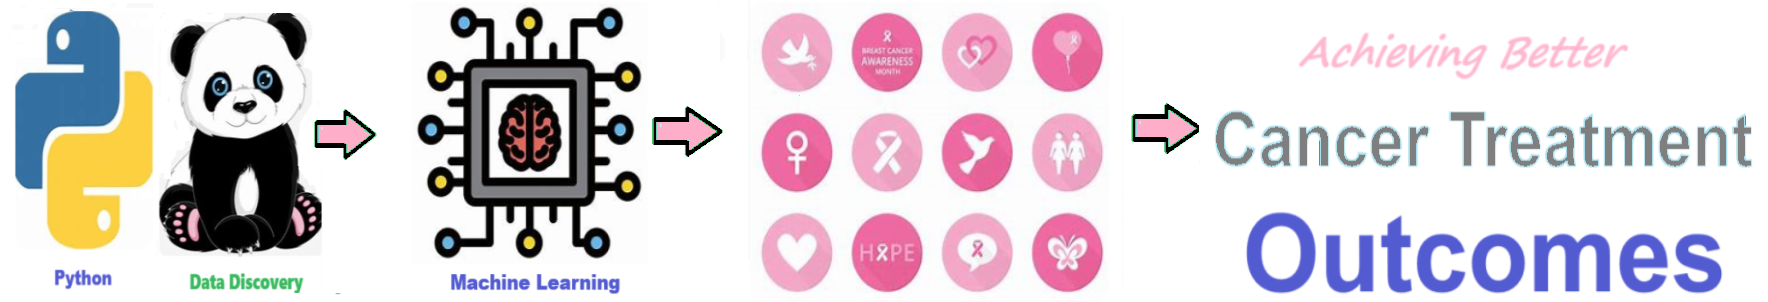

# Cancer Treatment Outcomes

## Analysis to achieve improved patient outcomes 

#### by Joe Eberle started on 04/17/2024 - https://github.com/JoeEberle/ - josepheberle@outlook.com

Analysis of **cancer treatment outcomes** involves assessing various parameters such as remission rates, cancer-free survival, ongoing surveillance, and mortality rates. Remission indicates a temporary or permanent absence of cancer signs and symptoms, often achieved through successful treatment. Cancer-free survival refers to the duration without any evidence of cancer recurrence following treatment, highlighting the effectiveness of interventions in preventing disease progression. Ongoing surveillance involves regular medical monitoring to detect any potential cancer recurrence or development of new tumors, ensuring timely intervention if needed. Mortality rates provide insights into the overall effectiveness of treatments in reducing the risk of death from cancer. By analyzing these outcomes, healthcare professionals can evaluate the impact of treatment strategies, tailor interventions to individual patient needs, and continuously improve cancer care protocols.

A **cancer care timeline** begins with the screening process or first diagnosis. If any abnormalities or issues are detected, the next step is the diagnosis, where the presence and type of cancer are confirmed. Following diagnosis, the patient is referred to an oncology specialist. The timeline then tracks the period of treatment planning, which includes further testing and consultations to develop a personalized treatment strategy. Once the treatment plan is in place, the patient undergoes the prescribed treatment, which may involve surgery, chemotherapy, radiation, or other therapies. After treatment, the patient enters a phase of follow-up care, where their progress is regularly monitored. The timeline concludes with one of three outcomes: remission, where no signs of cancer are detected and periodic monitoring continues; watchful waiting, where the patient is actively monitored without immediate treatment for slow-growing cancers; or end-of-life care, where palliative care is provided when treatment is no longer effective, leading up to the patient's death.

## Cancer Treatment Outcomes:
1. **Cancer-free** - The absence of detectable cancer cells in the body following successful treatment, indicating complete remission.
2. **Remission** - A period during which the signs and symptoms of cancer are reduced or absent. Remission can be partial (some cancer cells remain) or complete (no evidence of cancer).
3. **Ongoing treatment** - The patient continues to receive active cancer treatment, such as chemotherapy, radiation therapy, or immunotherapy, to control or manage the disease.
4. **Hospice** - End-of-life care provided to patients with advanced cancer who are no longer receiving curative treatment. Hospice care focuses on comfort and quality of life.
5. **Death** - The patient has succumbed to cancer or cancer-related complications.
6. **Ongoing surveillance** - Regular monitoring of cancer survivors for signs of disease recurrence or late effects of treatment, typically through medical exams, imaging tests, and blood tests.
7. **Disease progression** - The cancer has worsened or spread despite treatment, indicating treatment failure or resistance.
8. **Survivorship** - The period following cancer treatment when the patient transitions from active treatment to regular follow-up care. Survivorship focuses on maintaining physical and emotional well-being.
9. **Quality of life** - The overall well-being and satisfaction with life experienced by cancer patients, including physical, emotional, social, and functional aspects.
10. **Symptom management** - Efforts to alleviate and control cancer-related symptoms, such as pain, nausea, fatigue, and depression, to improve the patient's comfort and quality of life.


In [1]:
first_install = False 
if first_install:
    !pip install schedule
    !pip install zipp

In [2]:
import os
import schedule
from datetime import datetime
import pandas as pd 
import quick_logger as ql
import talking_code as tc 
import file_manager as fm 
import time
print(f"Libraries Imported succesfully on {datetime.now().date()} at {datetime.now().time()}") 

Libraries Imported succesfully on 2024-05-06 at 01:04:54.755862


## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'cancer_treatment_outcomes'

## Optional Step 0 - Intitiate Logging and debugging 

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql
import json
global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_start(solution_name, start_time) 
ql.set_speaking_log(False)
ql.set_speaking_steps(False)
ql.pvlog('info',f'Process {solution_name} Step 0 - Initializing and starting Logging Process.') 

Process cancer_treatment_outcomes Step 0 - Initializing and starting Logging Process.


In [5]:
def create_dataframe_list(df, title, term_column_number = 0, definition_column_number = 1):
    mark_down = ""
    if title:
        mark_down += f"## {title} \n"
    for index, row in df.iterrows():
        mark_down += f" {index + 1}. **{row[df.columns[term_column_number]]}** - {row[df.columns[definition_column_number]]} \n "
    return mark_down 

In [6]:
cancer_treatment_outcomes = [
    {"outcome": "Cancer-free", "description": "The absence of detectable cancer cells in the body following successful treatment, indicating complete remission."},
    {"outcome": "Remission", "description": "A period during which the signs and symptoms of cancer are reduced or absent. Remission can be partial (some cancer cells remain) or complete (no evidence of cancer)."},
    {"outcome": "Ongoing treatment", "description": "The patient continues to receive active cancer treatment, such as chemotherapy, radiation therapy, or immunotherapy, to control or manage the disease."},
    {"outcome": "Hospice", "description": "End-of-life care provided to patients with advanced cancer who are no longer receiving curative treatment. Hospice care focuses on comfort and quality of life."},
    {"outcome": "Death", "description": "The patient has succumbed to cancer or cancer-related complications."},
    {"outcome": "Ongoing surveillance", "description": "Regular monitoring of cancer survivors for signs of disease recurrence or late effects of treatment, typically through medical exams, imaging tests, and blood tests."},
    {"outcome": "Disease progression", "description": "The cancer has worsened or spread despite treatment, indicating treatment failure or resistance."},
    {"outcome": "Survivorship", "description": "The period following cancer treatment when the patient transitions from active treatment to regular follow-up care. Survivorship focuses on maintaining physical and emotional well-being."},
    {"outcome": "Quality of life", "description": "The overall well-being and satisfaction with life experienced by cancer patients, including physical, emotional, social, and functional aspects."},
    {"outcome": "Symptom management", "description": "Efforts to alleviate and control cancer-related symptoms, such as pain, nausea, fatigue, and depression, to improve the patient's comfort and quality of life."},
    {"outcome": "Palliative care", "description": "Specialized medical care focused on providing relief from the symptoms, pain, and stress of a serious illness like cancer. Palliative care aims to improve the quality of life for both the patient and their family, regardless of the stage of the disease or the need for other treatments."},
    {"outcome": "Adjuvant therapy", "description": "Additional cancer treatment given after the primary treatment, such as surgery or chemotherapy, to kill any remaining cancer cells and reduce the risk of cancer recurrence. Adjuvant therapy aims to improve the long-term outcome and survival rate of cancer patients."},
    {"outcome": "Recurrence", "description": "The return of cancer after a period of remission or absence, indicating that the disease has come back."},
    {"outcome": "Secondary cancer", "description": "The development of a new cancer unrelated to the original cancer diagnosis, either in the same organ or a different part of the body. Secondary cancers may occur as a result of previous cancer treatments, genetic predisposition, or environmental factors."}
]


In [7]:
# Save the JSON variable to a file
with open("cancer_treatment_outcomes.json", "w") as file:
    json.dump(cancer_treatment_outcomes, file)

# # Load the JSON file into a pandas DataFrame
with open("cancer_treatment_outcomes.json", "r") as file:
    df = pd.DataFrame(json.load(file))
df.to_excel("cancer_treatment_outcomes.xlsx") 

md_list = create_dataframe_list(df, "Cancer Treatment Outcomes", 0, 1)
file_name = "solution_list.md"
with open(file_name, 'w') as f:
    # Write the template to the readme.md file
     f.write(md_list)
print(md_list) 

## Cancer Treatment Outcomes 
 1. **Cancer-free** - The absence of detectable cancer cells in the body following successful treatment, indicating complete remission. 
  2. **Remission** - A period during which the signs and symptoms of cancer are reduced or absent. Remission can be partial (some cancer cells remain) or complete (no evidence of cancer). 
  3. **Ongoing treatment** - The patient continues to receive active cancer treatment, such as chemotherapy, radiation therapy, or immunotherapy, to control or manage the disease. 
  4. **Hospice** - End-of-life care provided to patients with advanced cancer who are no longer receiving curative treatment. Hospice care focuses on comfort and quality of life. 
  5. **Death** - The patient has succumbed to cancer or cancer-related complications. 
  6. **Ongoing surveillance** - Regular monitoring of cancer survivors for signs of disease recurrence or late effects of treatment, typically through medical exams, imaging tests, and blood tests

In [11]:
definition = '''
Analysis of **cancer treatment outcomes** involves assessing various parameters such as remission rates, cancer-free survival, ongoing surveillance, and mortality rates. Remission indicates a temporary or permanent absence of cancer signs and symptoms, often achieved through successful treatment. Cancer-free survival refers to the duration without any evidence of cancer recurrence following treatment, highlighting the effectiveness of interventions in preventing disease progression. Ongoing surveillance involves regular medical monitoring to detect any potential cancer recurrence or development of new tumors, ensuring timely intervention if needed. Mortality rates provide insights into the overall effectiveness of treatments in reducing the risk of death from cancer. By analyzing these outcomes, healthcare professionals can evaluate the impact of treatment strategies, tailor interventions to individual patient needs, and continuously improve cancer care protocols.

A **cancer care timeline** begins with the screening process or first diagnosis. If any abnormalities or issues are detected, the next step is the diagnosis, where the presence and type of cancer are confirmed. Following diagnosis, the patient is referred to an oncology specialist. The timeline then tracks the period of treatment planning, which includes further testing and consultations to develop a personalized treatment strategy. Once the treatment plan is in place, the patient undergoes the prescribed treatment, which may involve surgery, chemotherapy, radiation, or other therapies. After treatment, the patient enters a phase of follow-up care, where their progress is regularly monitored. The timeline concludes with one of three outcomes: remission, where no signs of cancer are detected and periodic monitoring continues; watchful waiting, where the patient is actively monitored without immediate treatment for slow-growing cancers; or end-of-life care, where palliative care is provided when treatment is no longer effective, leading up to the patient's death.
''' 
# Write the solution defitions out to the solution_description.md file
file_name = "solution_description.md"
with open(file_name, 'w') as f:
    # Write the template to the readme.md file
     f.write(definition)

talking_code = False
if talking_code:
    tc.print_say(definition) 
else:
    print(definition)   


Analysis of **cancer treatment outcomes** involves assessing various parameters such as remission rates, cancer-free survival, ongoing surveillance, and mortality rates. Remission indicates a temporary or permanent absence of cancer signs and symptoms, often achieved through successful treatment. Cancer-free survival refers to the duration without any evidence of cancer recurrence following treatment, highlighting the effectiveness of interventions in preventing disease progression. Ongoing surveillance involves regular medical monitoring to detect any potential cancer recurrence or development of new tumors, ensuring timely intervention if needed. Mortality rates provide insights into the overall effectiveness of treatments in reducing the risk of death from cancer. By analyzing these outcomes, healthcare professionals can evaluate the impact of treatment strategies, tailor interventions to individual patient needs, and continuously improve cancer care protocols.

A **cancer care tim

## Step 0 - Process End - display log

In [9]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2024-05-06 01:04:54,786 - INFO - START cancer_treatment_outcomes =============================================
2024-05-06 01:04:54,786 - INFO - START cancer_treatment_outcomes Start Time = 2024-05-06 01:04:54
2024-05-06 01:04:54,786 - INFO - cancer_treatment_outcomes Step 0 - Initialize the configuration file parser
2024-05-06 01:04:54,787 - INFO - Process cancer_treatment_outcomes Step 0 - Initializing and starting Logging Process.
2024-05-06 01:04:54,908 - INFO - PERFORMANCE cancer_treatment_outcomes The total process duration was:0.12
2024-05-06 01:04:54,908 - INFO - PERFORMANCE cancer_treatment_outcomes Stop Time = 2024-05-06 01:04:54
2024-05-06 01:04:54,908 - INFO - PERFORMANCE cancer_treatment_outcomes Short process duration less than 3 Seconds:0.12
2024-05-06 01:04:54,908 - INFO - PERFORMANCE cancer_treatment_outcomes Performance optimization is not reccomended
2024-05-06 01:04:54,908 - INFO - END cancer_treatment_outcomes =============================================



#### https://github.com/JoeEberle/ -- josepheberle@outlook.com